In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Make outputs folder
from pathlib import Path

OUT_DIR = Path('outputs')
OUT_DIR.mkdir(exist_ok=True)

In [3]:
# upload data

Data_path = "/content/drive/MyDrive/EDA/_Amazon_Clothing_Sales_2025 DS12  - Amazon_Clothing_Sales_2025.csv"

def load_data(path):
    df = pd.read_csv(path, low_memory=False)
    return df

# Load
try:
    df = load_data(Data_path)
except Exception as e:
    raise FileNotFoundError(f"Could not read the dataset from {Data_path}.\nError: {e}")

print('Rows, Columns:', df.shape)
print('\nSample:')
print(df.head(3).T)
df



Rows, Columns: (25000, 19)

Sample:
                                  0                1                2
order_id            #HLWTRIGAJB0RFL  #9LMWG6T6H0IPE0  #Q6J5C5621SSE5V
customer_id            A86556872001     0A9218115AAA     8A5A09200074
product_id               6Q3V14RXRF       33MRMEM3WN       E674NZH16V
product_name        Huggies Rompers  Gerber Blankets     Fossil Jeans
main_category                  baby             Baby              Men
sub_category                Rompers         Blankets            Jeans
brand                       Huggies           Gerber           Fossil
price                        118.62            26.84           219.38
quantity                          1                1                2
discount_percent                 10               15               25
final_price                  106.76            22.81           329.07
payment_method               PayPal        Gift Card        Gift Card
review_rating                     3                2  

,order_id,customer_id,product_id,product_name,main_category,sub_category,brand,price,quantity,discount_percent,final_price,payment_method,review_rating,order_date,delivery_days,is_returned,region,customer_age_group,device_type
0,#HLWTRIGAJB0RFL,A86556872001,6Q3V14RXRF,Huggies Rompers,baby,Rompers,Huggies,118.62,1,10,106.76,PayPal,3,2024-09-10,5.0,0,Midwest,25-34,Mobile
1,#9LMWG6T6H0IPE0,0A9218115AAA,33MRMEM3WN,Gerber Blankets,Baby,Blankets,Gerber,26.84,1,15,22.81,Gift Card,2,2025-06-25,8.0,0,West,25-34,Mobile
2,#Q6J5C5621SSE5V,8A5A09200074,E674NZH16V,Fossil Jeans,Men,Jeans,Fossil,219.38,2,25,329.07,Gift Card,4,2025-01-08,5.0,0,Northeast,35-44,Mobile
3,#J145DOUKB5RVBN,97602786977A,ETMIXJHFAT,Carter's Rompers,Baby,Rompers,Carter's,12.05,1,0,12.05,Credit Card,5,2024-08-28,3.0,0,Midwest,45-54,Mobile
4,#7ZXNMSUU22AK4J,744297746010,5BYOWYYY5P,Adidas Sneakers,Kids,Sneakers,Adidas,145.36,1,10,130.82,Credit Card,1,2024-11-12,5.0,0,NaN,45-54,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,#ILAE3C44K8ST2N,AA4894A31451,2NC0ZUOVYO,Carter's Hats,Baby,Hats,Carter's,128.26,1,20,102.61,PayPal,4,2024-11-15,9.0,0,Northeast,NaN,Desktop
24996,#6FRTXV3I6X8MR6,690989345A38,Y0ASBZXA10,Reebok Sandals,women,Sandals,Reebok,200.66,3,20,481.58,Credit Card,3,2025-01-10,4.0,0,Northeast,45-54,Desktop
24997,#DU71O3MXXZVT1L,440170188725,590V1TJQGC,Levi's Jeans,Men,Jeans,Levi's,130.87,2,20,209.39,Credit Card,1,2025-01-09,8.0,0,Midwest,25-34,App
24998,#YHNPOPWUO47P0G,A8A224901522,QNPGMXCYIS,The Peanutshell Booties,Baby,Booti3s,The Peanutshell,172.17,1,15,146.34,Cash on Delivery,4,2024-10-23,4.0,0,Northeast,25-34,Desktop


In [4]:

# Convert order_date to datetime and show data types
df.order_date = pd.to_datetime(df.order_date)
df.dtypes

,0
order_id,object
customer_id,object
product_id,object
product_name,object
main_category,object
sub_category,object
brand,object
price,float64
quantity,int64
discount_percent,int64



2.	Missing Values:

○	Quantify missingness per column.

○	Decide strategy: impute, flag, or drop



In [5]:
# missing values

missing = df.isnull().sum().sort_values(ascending = False)

# missing percentage
missing_pct = (missing / len(df) * 100).round(2)

#combine to generate a report
# pd.concat([...], axis=1) → puts the two Series (missing and missing_pct) side-by-side into a DataFrame.

miss_report = pd.concat([missing, missing_pct], axis =1)

#rename the column as missing_count and missing_pct

miss_report.columns = ['missing_count', 'missing_pct']

#print report

print('\nMissingness report:\n')
print(miss_report)

# Strategy for missing values

print('\nSuggested actions:')
for col, pct in miss_report.missing_pct.items():
    if pct == 0:
          continue
    if pct > 50:
        print(f"-{col}: >50% missing -> drop or flag")
    elif pct > 0:
          print(f"-{col}: {pct} % missing -> impute or flag")



Missingness report:

                    missing_count  missing_pct
device_type                  1250          5.0
customer_age_group           1250          5.0
brand                        1250          5.0
region                       1250          5.0
payment_method               1250          5.0
delivery_days                 250          1.0
price                         250          1.0
product_id                      0          0.0
customer_id                     0          0.0
order_id                        0          0.0
main_category                   0          0.0
final_price                     0          0.0
discount_percent                0          0.0
quantity                        0          0.0
sub_category                    0          0.0
product_name                    0          0.0
review_rating                   0          0.0
order_date                      0          0.0
is_returned                     0          0.0

Suggested actions:
-device_type: 5.0 

**3.	Duplicates & Integrity:**

○	Are there duplicates?

○	Consistency between price, discount_percent, and final_price (validate formula).


In [6]:
#duplicates

print('\nChecking duplicate order_id count:')

print(df.order_id.duplicated().sum())

if 'order_id' in df.columns:
    dup_orders = df.duplicated(subset=['order_id'], keep=False).sum()
    print('duplicate order_id rows:', dup_orders)
else:
    print('order_id not found in columns')


Checking duplicate order_id count:
0
duplicate order_id rows: 0


In [7]:
# Validate price/discount/final_price consistency if present

if all (col in df.columns for col in['price' , 'discount_percent' ,'final_price', 'quantity']):
  # Check if discount looks like a percentage

  if (df['discount_percent'] <= 1).all():
    print('discount is a percentage')
    expected_final = df['price'] * (1 - df['discount_percent'])
  else:
    print('discount is a fixed amount')
    expected_final = df['price'] - df['discount_percent']


  #  Compare actual and expected final prices
  mismatches = (df['final_price'].round(2) != expected_final).sum()
  print(f"{mismatches} rows have mismatched final prices")

else:
  print('price, discount, or final_price not found in columns')

discount is a fixed amount
23670 rows have mismatched final prices


In [8]:
# Validate price/discount/final_price consistency if present
if set(['price','discount_percent','final_price','quantity']).issubset(df.columns):
    # Check if discount looks like a percentage
    #df_calculated_final stores calculated value in a new column
    # *df["quantity"] calculate multiple orders
    # df['price'] * (1-df['discount_percent']) calculate the discount

    df['df_calculated_final'] = (df['price'] * (1-df['discount_percent']/100) * df['quantity'])

    # Compare actual and expected final prices
    mismatches = (df['df_calculated_final'] - df['final_price']).abs() > 0.5
    print('Rows with inconsistency between computed final and final_price:', mismatches.sum())
    if mismatches.sum() > 0:
        df.loc[mismatches, 'price_discount_mismatch'] = True
else:
    print('One or more price/discount/final_price/quantity columns missing — skipping integrity check')




Rows with inconsistency between computed final and final_price: 0


4.	Outliers:

Check and treat outliers.


In [9]:
# 4. Outliers: simple winsorization suggestions and detection

# get the numeric columns

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
count_numeric_cols = len(numeric_cols)
print('Number of numeric columns:', count_numeric_cols)
print('Numeric columns:', numeric_cols)

# exclude the column from the Outlier detection

exclude_col = ['review_rating', 'is_returned', 'df_calculated_final']

# get the numeric columns, excluding the above one

numeric_cols = df.select_dtypes(include=[np.number]).columns.difference(exclude_col).tolist()
#count_numeric_cols = len(numeric_cols)
print('Numeric columns:', list(numeric_cols))

# Show IQR-based outlier counts for selected numeric columns

for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 -1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    print(f"\nOutlier count for {col}: {outlier_count}")

Number of numeric columns: 8
Numeric columns: ['price', 'quantity', 'discount_percent', 'final_price', 'review_rating', 'delivery_days', 'is_returned', 'df_calculated_final']
Numeric columns: ['delivery_days', 'discount_percent', 'final_price', 'price', 'quantity']

Outlier count for delivery_days: 0

Outlier count for discount_percent: 0

Outlier count for final_price: 174

Outlier count for price: 0

Outlier count for quantity: 0


**Handle Outlier**

Highlight these extreme sales as key business insights.

During analysis, we identified 174 outliers in the final_price column using the IQR method. Since final_price represents revenue, these extreme values likely correspond to high-value sales, which are important business insights.

Instead of removing them, we applied the following strategies:

**Capping**: Values above the upper bound and below the lower bound were capped to reduce the effect of extreme values on statistical analysis.

**Log Transformation**: A log transformation was applied to reduce skewness and make visualizations and modeling more robust.

By keeping these outliers, we preserve valuable information about high-value transactions, which could help identify premium customer segments or trends in product pricing.

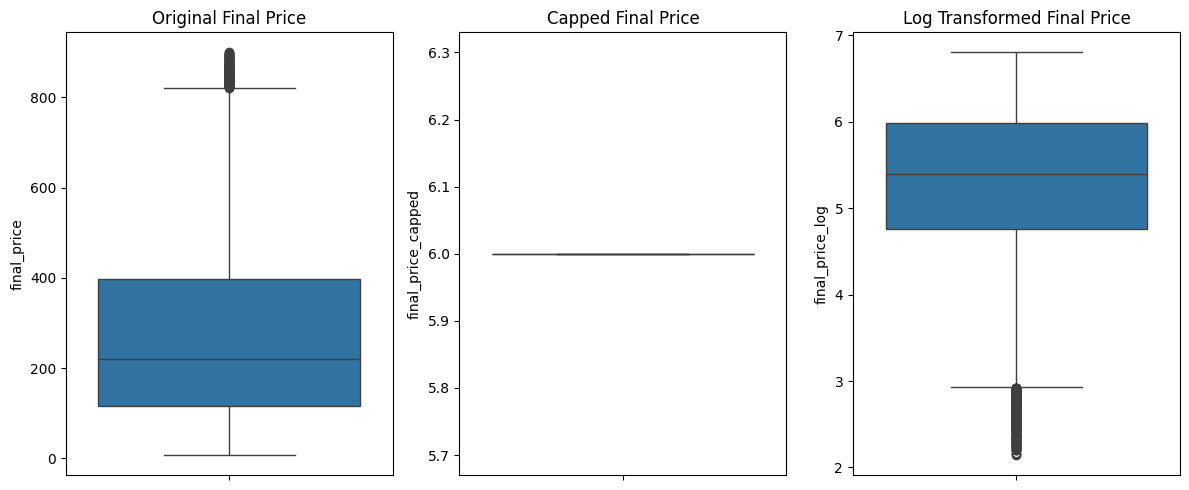

In [10]:
# Cap the outliers
df['final_price_capped'] = df['final_price'].apply(
    lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x)
)

# Log transformation to reduce skewness
df['final_price_log'] = np.log1p(df['final_price'])

# Visualization
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
sns.boxplot(y=df['final_price'])
plt.title('Original Final Price')

plt.subplot(1,3,2)
sns.boxplot(y=df['final_price_capped'])
plt.title('Capped Final Price')

plt.subplot(1,3,3)
sns.boxplot(y=df['final_price_log'])
plt.title('Log Transformed Final Price')

plt.tight_layout()
plt.show()

**Feature engineering** is creating new columns (features) from your raw data that make it easier to analyze or find insights.

**Think of it like this**: raw data is messy, and sometimes you need to extract information hidden inside a column. For example, from a column order_date, we can figure out the month, weekday, or year, which can help us answer questions like:

Which month has the highest sales?

Which day of the week do people buy more?

How does sales grow year over year?

5**.	Feature Engineering:**

○	Extract order_month, order_weekday, order_year from order_date.

○	Compute discount_amount = price * discount_percent / 100.

○	Create unit_price = final_price / quantity.

○	Flag “fast” vs “slow” delivery (e.g., delivery_days threshold).

○	Customer-level aggregates: total spend, total orders, average rating given, return rate.



In [11]:
# extract order_month, order_weekday, order_year from order_date.

# Convert order_date column to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# If we skip this step, Pandas won’t know it’s a date and can’t extract month, weekday, etc.

# pd.to_datetime() automatically detects the format and converts it.

df['order_month'] = df['order_date'].dt.month

#.dt.month gives numbers 1 to 12 representing the month.

df['order_weekday'] = df['order_date'].dt.weekday

#.dt.weekday gives the day of the week Mon-Sun
df['order_year'] = df['order_date'].dt.year

# .dt.year gives the year.This helps compare sales year by year

# .dt.weekday gives numbers 0 to 6 representing the weekday.

df['order_year'] = df['order_date'].dt.year

df[['order_date', 'order_year', 'order_month', 'order_weekday']].head()

#order_month → find monthly sales trends.

# order_weekday → find best-selling weekdays.

# order_year → see yearly growth or decline.


,order_date,order_year,order_month,order_weekday
0,2024-09-10,2024,9,1
1,2025-06-25,2025,6,2
2,2025-01-08,2025,1,2
3,2024-08-28,2024,8,2
4,2024-11-12,2024,11,1


In [12]:
if 'order_date' in df.columns:
    df['order_month'] = df['order_date'].dt.to_period('M')
    df['order_weekday'] = df['order_date'].dt.day_name()
    df['order_year'] = df['order_date'].dt.year

df[['order_date', 'order_year', 'order_month', 'order_weekday']].head()
#

,order_date,order_year,order_month,order_weekday
0,2024-09-10,2024,2024-09,Tuesday
1,2025-06-25,2025,2025-06,Wednesday
2,2025-01-08,2025,2025-01,Wednesday
3,2024-08-28,2024,2024-08,Wednesday
4,2024-11-12,2024,2024-11,Tuesday


In [13]:
 # Compute discount_amount = price * discount_percent / 100.
# check the price and discount_percent is the column

df[['price', 'discount_percent']].head()
df['discount_amount'] = df['price'] * df['discount_percent'] / 100  # Compute discount_amount
df[['price', 'discount_percent', 'discount_amount']]

,price,discount_percent,discount_amount
0,118.62,10,11.8620
1,26.84,15,4.0260
2,219.38,25,54.8450
3,12.05,0,0.0000
4,145.36,10,14.5360
...,...,...,...
24995,128.26,20,25.6520
24996,200.66,20,40.1320
24997,130.87,20,26.1740
24998,172.17,15,25.8255


In [14]:
# Create unit_price = final_price / quantity.

df[['final_price', 'quantity']].head()
df['unit_price'] = df['final_price'] /df['quantity']
df[['final_price', 'quantity', 'unit_price']].head()

,final_price,quantity,unit_price
0,106.76,1,106.760
1,22.81,1,22.810
2,329.07,2,164.535
3,12.05,1,12.050
4,130.82,1,130.820


In [15]:
# ○	Flag “fast” vs “slow” delivery (e.g., delivery_days threshold).

df['delivery_days'].head()
df['delivery_speed'] = np.where(df['delivery_days'] <= 3, 'Fast', 'Slow')
df[['delivery_days', 'delivery_speed']].head()

,delivery_days,delivery_speed
0,5.0,Slow
1,8.0,Slow
2,5.0,Slow
3,3.0,Fast
4,5.0,Slow


In [16]:
# Customer-level aggregates: total spend, total orders, average rating given, return rate.

df[['customer_id', 'final_price', 'review_rating', 'is_returned']].head()
# use group by and agg() function to calculate the results

customer_df = df.groupby('customer_id').agg(
    total_spend=('final_price', 'sum'),       # Total money spent
    total_orders=('order_id', 'count'),       # Total number of orders
    average_rating=('review_rating', 'mean'), # Average rating
    return_rate=('is_returned', lambda x: (x==1).mean())  # Return percentage
).reset_index()

customer_df

,customer_id,total_spend,total_orders,average_rating,return_rate
0,0000A5486A60,565.98,1,2.0,0.0
1,000128A482A9,343.10,1,3.0,0.0
2,0006310A3377,203.02,1,5.0,0.0
3,00069A393862,541.82,1,3.0,0.0
4,00070A643221,86.88,1,4.0,0.0
...,...,...,...,...,...
24995,AAA992357434,159.62,1,3.0,0.0
24996,AAAA33688A18,112.50,1,4.0,0.0
24997,AAAA437A5312,79.60,1,3.0,0.0
24998,AAAA660A8A17,495.32,1,5.0,0.0


In [17]:
# Customers who ordered more than 1 time
repeat_customers = customer_df[customer_df['total_orders'] > 1]

repeat_customers.head()

,customer_id,total_spend,total_orders,average_rating,return_rate


**B. Univariate Analysis**

●	Distribution of price, final_price, discount_percent, review_rating, delivery_days.

●	Counts / frequency of main_category, sub_category, brand, payment_method, region, customer_age_group, device_type.

●	Returned vs non-returned proportion.

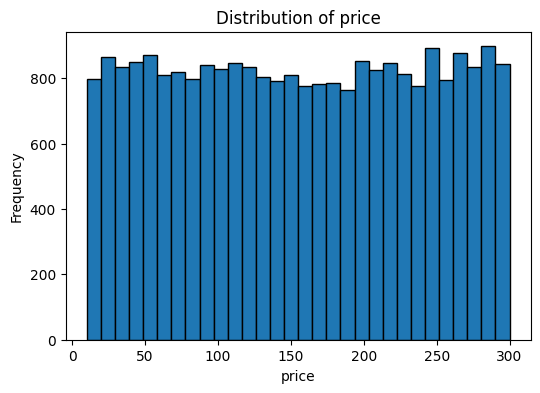

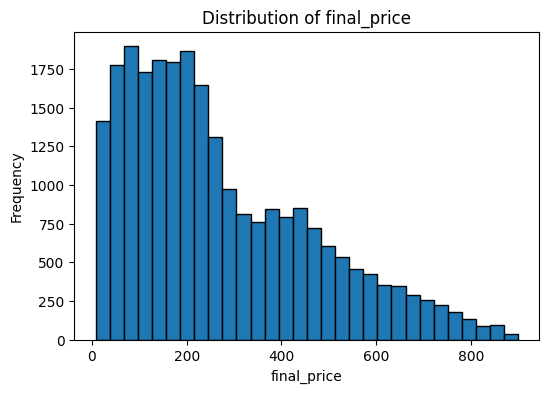

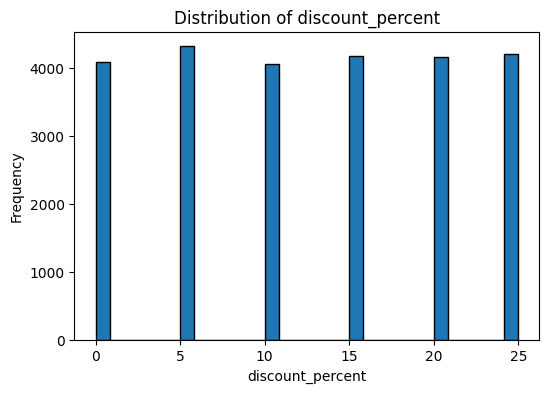

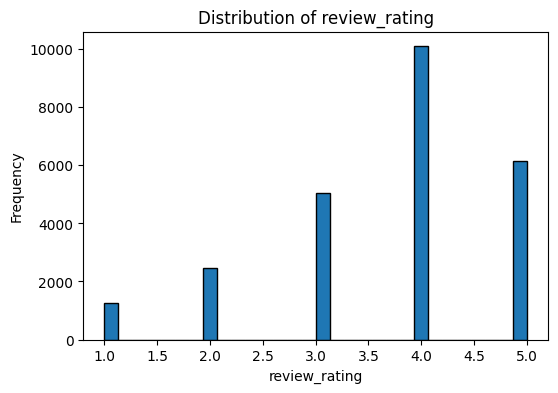

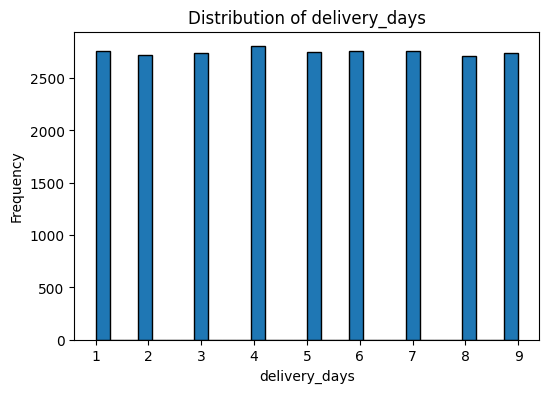

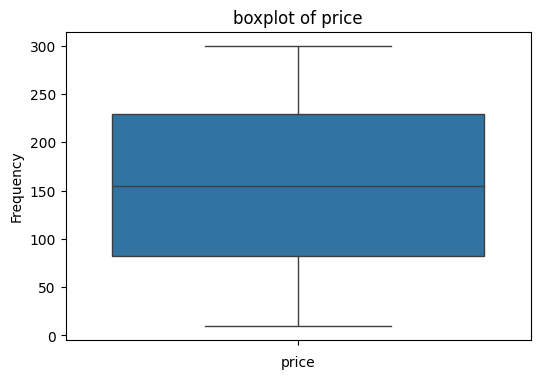

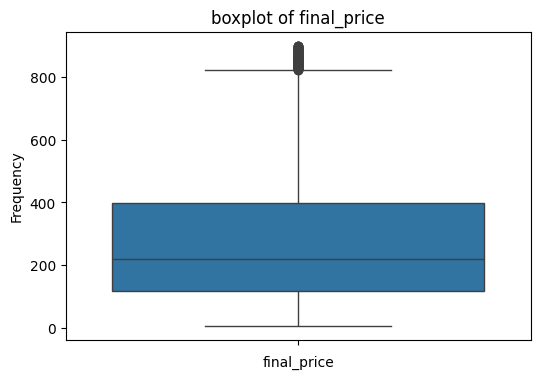

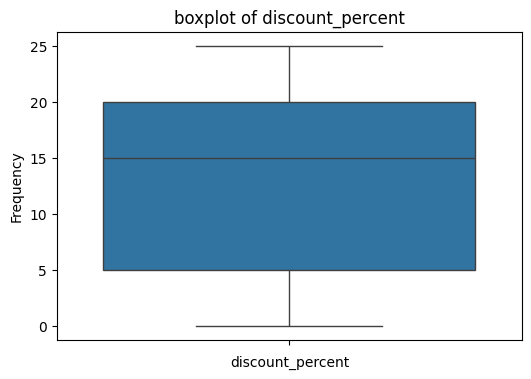

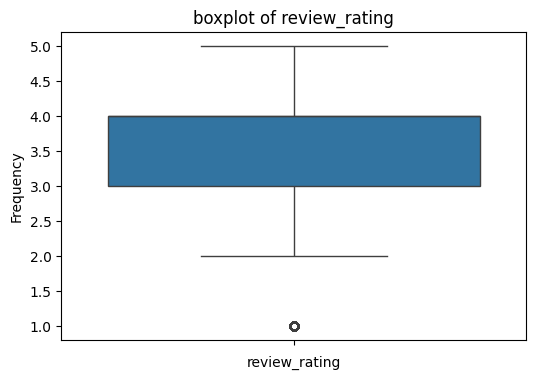

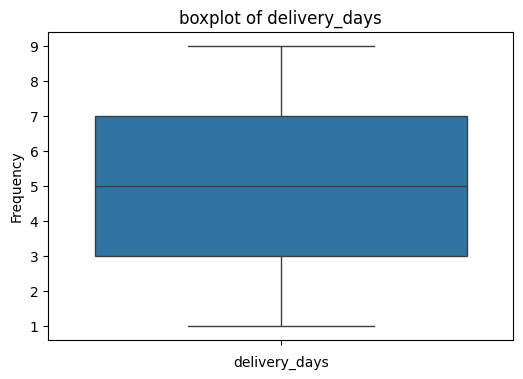

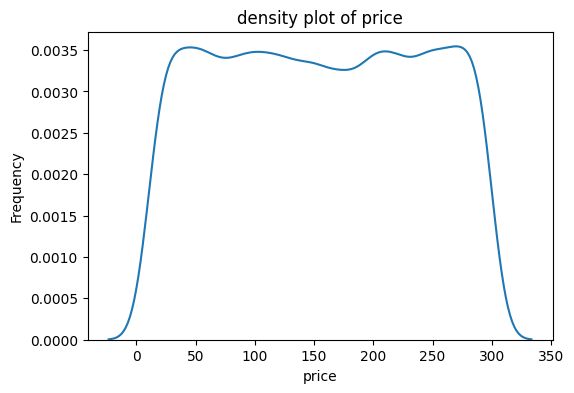

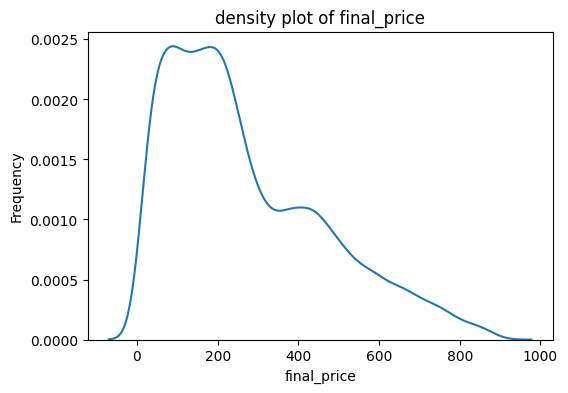

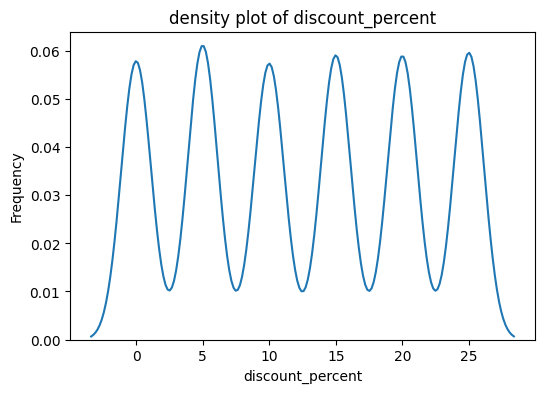

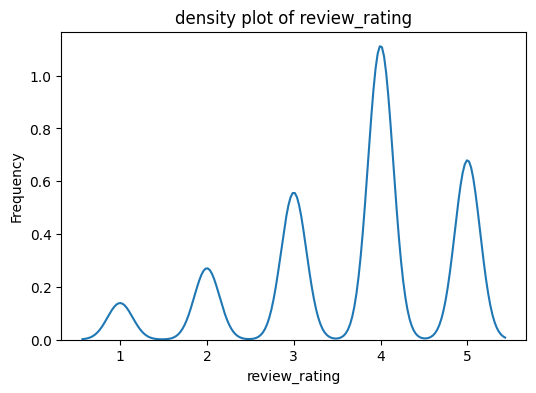

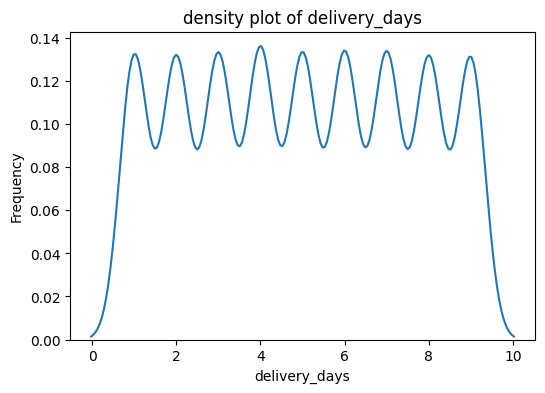

In [18]:
# See summary of all numeric columns
df[['price', 'final_price', 'discount_percent', 'review_rating', 'delivery_days']].describe()

numeric_cols = ['price', 'final_price', 'discount_percent', 'review_rating', 'delivery_days']

# Create histogram for each column
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

#create box plot for each column

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(df[col])
    plt.title(f'boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

#create density plot for each column

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df[col])
    plt.title(f'density plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()







Value counts for main_category:
main_category
Kids     5726
Men      5617
Baby     5604
Women    5595
men       653
women     626
kids      590
baby      589
Name: count, dtype: int64

Percentage:
main_category
Kids     22.904
Men      22.468
Baby     22.416
Women    22.380
men       2.612
women     2.504
kids      2.360
baby      2.356
Name: proportion, dtype: float64

Value counts for sub_category:
sub_category
Shorts      1285
Tops        1269
Shirts      1256
Hats        1254
Caps        1246
Sandals     1237
Handbags    1235
T-Shirts    1211
Jewelry     1151
Watches     1145
Shoes       1140
Sweaters    1137
Jeans       1137
Blankets    1134
Booties     1134
Jackets     1130
Sneakers    1127
Rompers     1126
Dresses     1094
Onesies     1067
Watch3s      144
Sn3ak3rs     142
Sho3s        136
On3si3s      129
Sw3at3rs     123
Romp3rs      120
Blank3ts     118
J3w3lry      118
Dr3ss3s      117
J3ans        114
Jack3ts      113
Booti3s      111
Name: count, dtype: int64

Percentage:

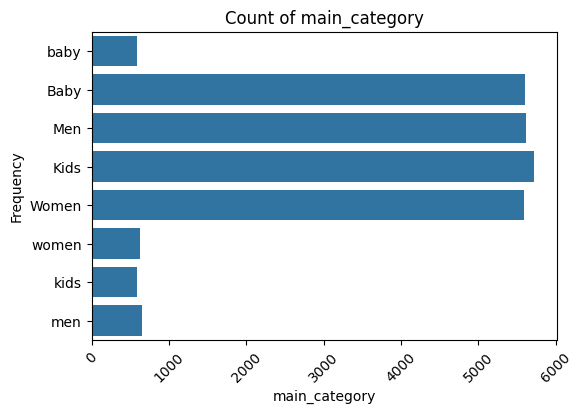

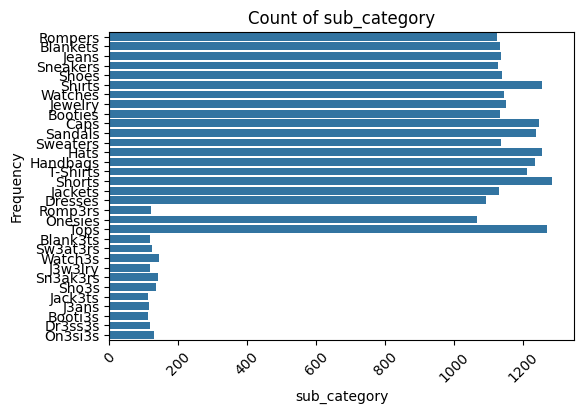

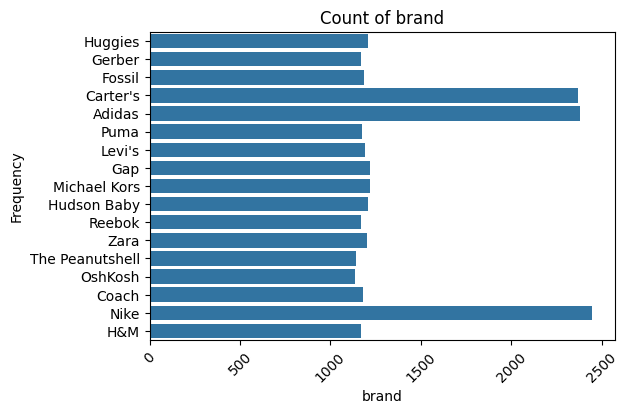

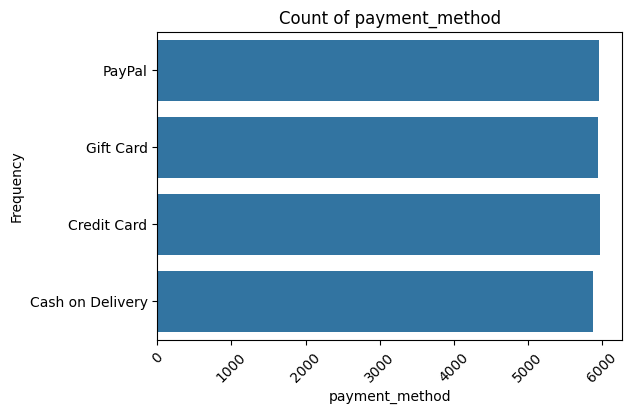

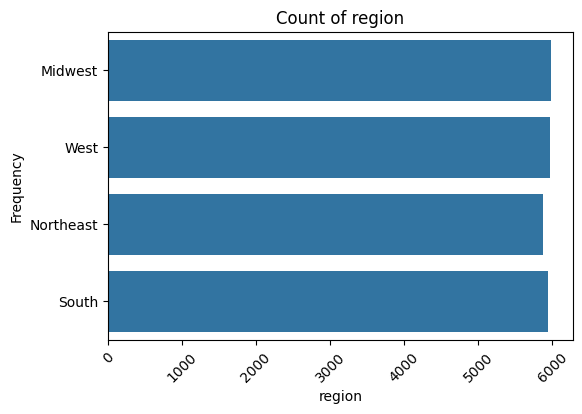

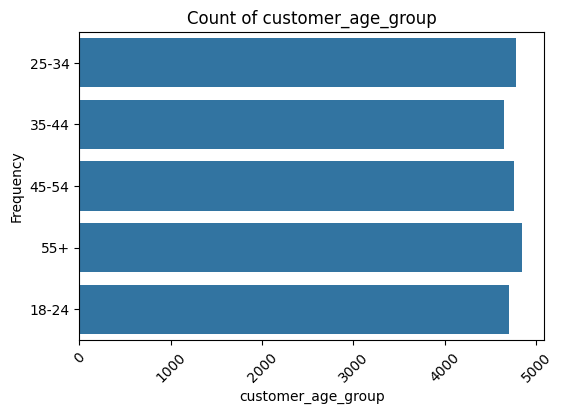

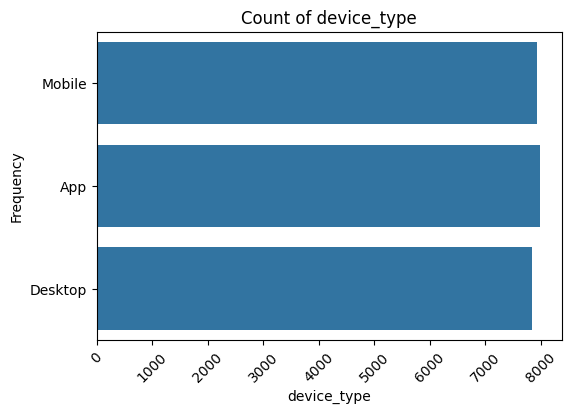

In [19]:
#	Counts / frequency of main_category, sub_category, brand, payment_method, region, customer_age_group, device_type.

categorical_cols = ['main_category', 'sub_category', 'brand', 'payment_method', 'region', 'customer_age_group', 'device_type']

for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())                 # counts
    print("\nPercentage:")
    print(df[col].value_counts(normalize=True)*100)  # percentages

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(df[col])
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

is_returned
0    22539
1     2461
Name: count, dtype: int64
is_returned
0    90.156
1     9.844
Name: proportion, dtype: float64


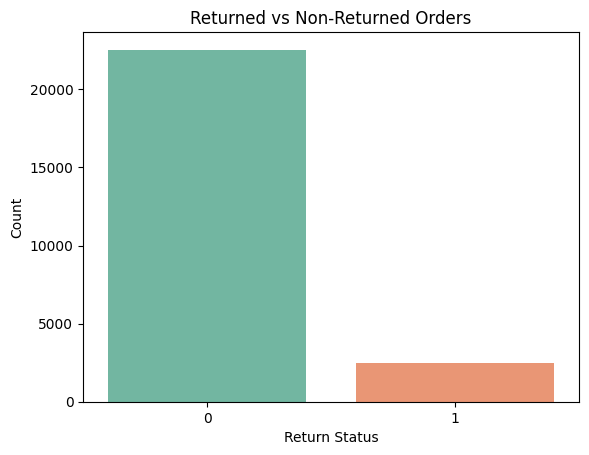

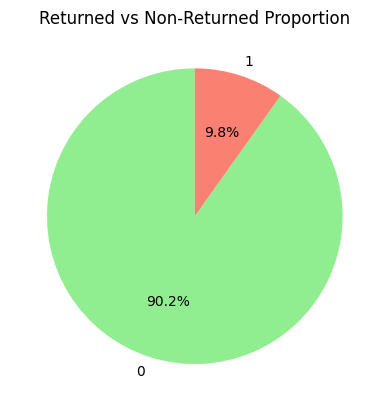

In [20]:
#	Returned vs non-returned proportion.

# Count how many are returned vs not
print(df['is_returned'].value_counts())

# Percentage
print(df['is_returned'].value_counts(normalize=True) * 100)

# Bar plot
sns.countplot(data=df, x='is_returned', palette="Set2")
plt.title("Returned vs Non-Returned Orders")
plt.xlabel("Return Status")
plt.ylabel("Count")
plt.show()

# Pie chart
df['is_returned'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=["lightgreen", "salmon"])
plt.title("Returned vs Non-Returned Proportion")
plt.ylabel("")
plt.show()

C. **Bivariate & Multivariate Analysis**

1.	Sales Performance:

○	Revenue over time (monthly / weekly trend).

○	Which categories/brands drive most revenue?

○	Price vs quantity sold (does higher price suppress quantity?).

2.	Discount Effectiveness:

○	Relationship between discount percent and quantity sold / revenue.


3.	Returns Analysis:

○	Return rate by category, brand, customer age group, device type.


4.	Customer Behavior:

○	High-value customers vs one-time buyers (segmentation).

○	Average order value (AOV) by region / age group.

5.	Delivery Performance:

○	Delivery days distribution and its effect on review rating / return probability.

6.	Rating Signal:

○	Average rating by brand, category, region.

○	Correlate low ratings with subsequent returns.

7.	Payment Method Insights:

○	Does payment method influence return likelihood or average spend?

8.	Cross-analysis:

○	E.g., return rate for mobile users vs desktop, region vs delivery performance, age group vs discount sensitivity.


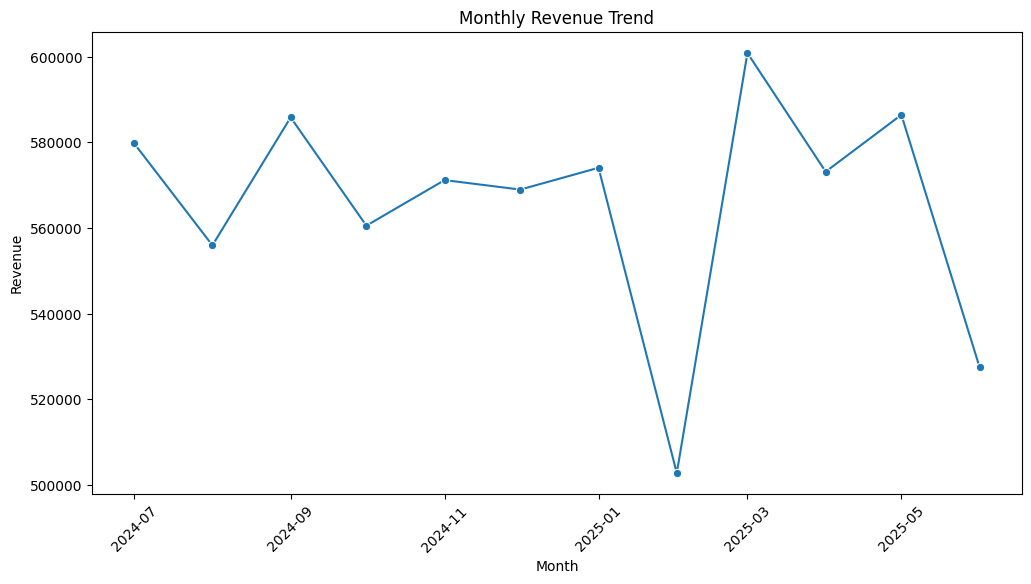

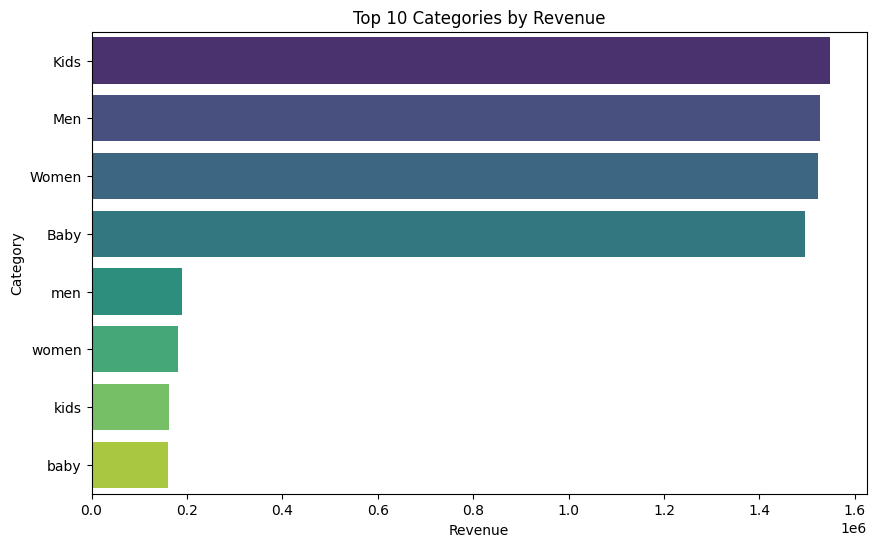

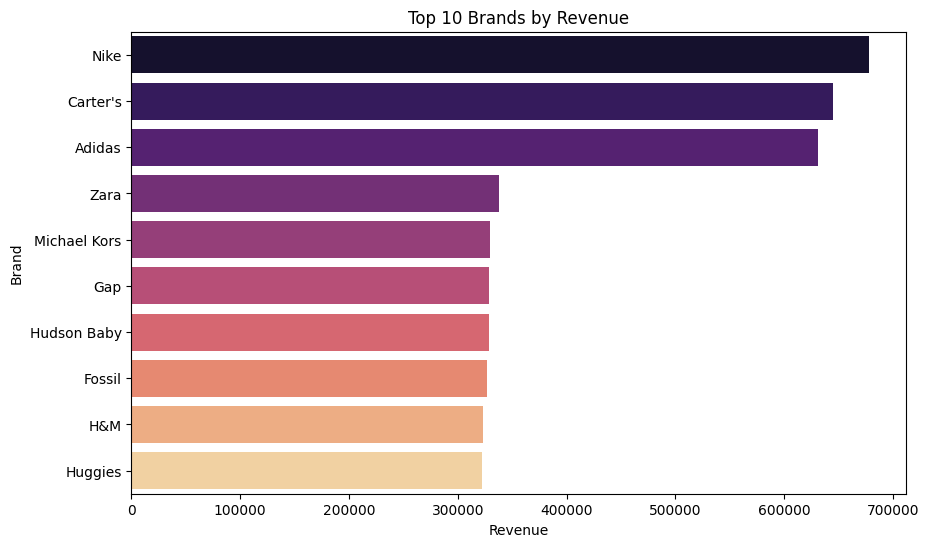

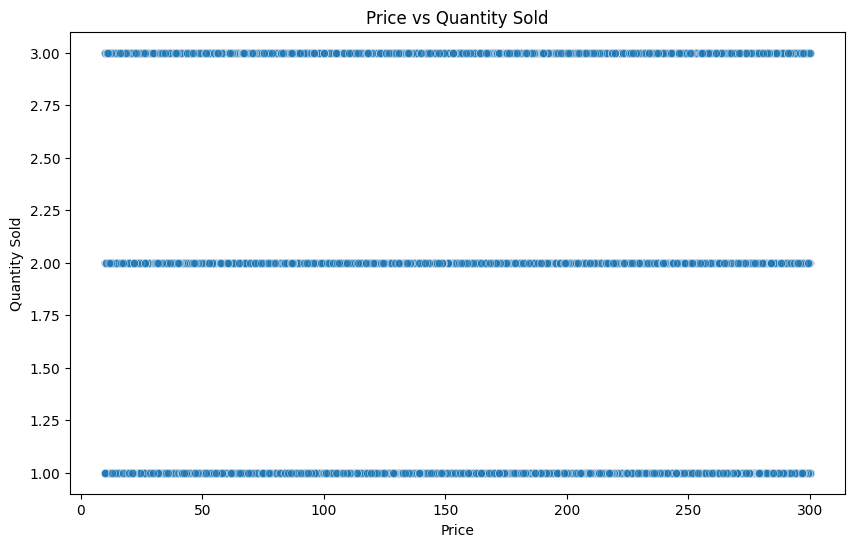

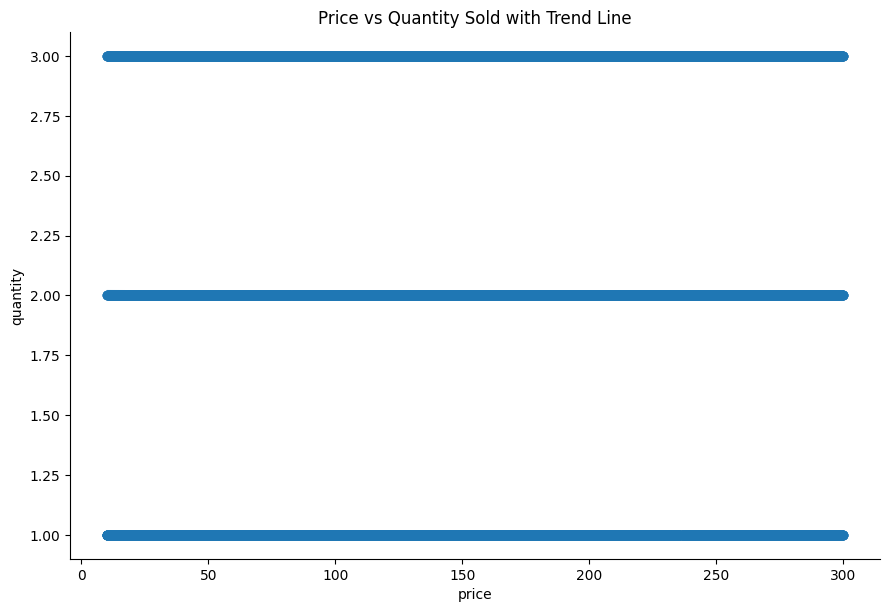

Correlation between price and quantity sold: -0.0


In [21]:

# Ensure date column is in datetime format
df['order_date'] = pd.to_datetime(df['order_date'])

# ----------------------------
# 1. Revenue Over Time
# ----------------------------

# Monthly revenue
monthly_revenue = df.groupby(df['order_date'].dt.to_period('M'))['final_price'].sum().reset_index()
monthly_revenue['order_date'] = monthly_revenue['order_date'].dt.to_timestamp()

# Weekly revenue
weekly_revenue = df.groupby(df['order_date'].dt.to_period('W'))['final_price'].sum().reset_index()
weekly_revenue['order_date'] = weekly_revenue['order_date'].dt.to_timestamp()

# Plot monthly revenue
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_revenue, x='order_date', y='final_price', marker='o')
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()

# ----------------------------
# 2. Top Categories / Brands by Revenue
# ----------------------------

# Revenue by main category
category_revenue = df.groupby('main_category')['final_price'].sum().sort_values(ascending=False).reset_index()

# Revenue by brand
brand_revenue = df.groupby('brand')['final_price'].sum().sort_values(ascending=False).reset_index()

# Plot top 10 categories
plt.figure(figsize=(10,6))
sns.barplot(data=category_revenue.head(10), x='final_price', y='main_category', palette="viridis")
plt.title("Top 10 Categories by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Category")
plt.show()

# Plot top 10 brands
plt.figure(figsize=(10,6))
sns.barplot(data=brand_revenue.head(10), x='final_price', y='brand', palette="magma")
plt.title("Top 10 Brands by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Brand")
plt.show()

# ----------------------------
# 3. Price vs Quantity Sold
# ----------------------------

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='price', y='quantity', alpha=0.6)
plt.title("Price vs Quantity Sold")
plt.xlabel("Price")
plt.ylabel("Quantity Sold")
plt.show()

# Scatter plot with trend line
sns.lmplot(data=df, x='price', y='quantity', height=6, aspect=1.5, scatter_kws={'alpha':0.6})
plt.title("Price vs Quantity Sold with Trend Line")
plt.show()

# Correlation between price and quantity
correlation = df['price'].corr(df['quantity'])
print("Correlation between price and quantity sold:", round(correlation, 2))


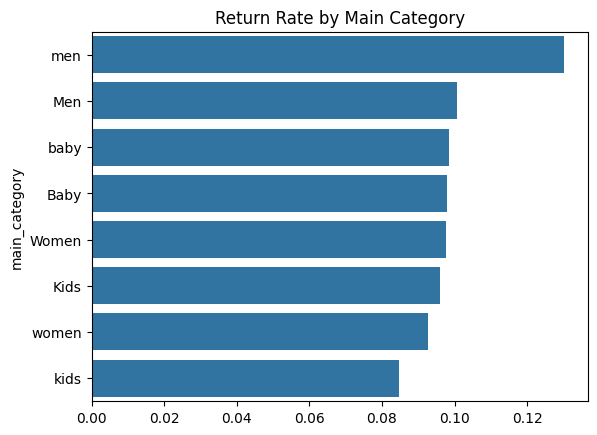

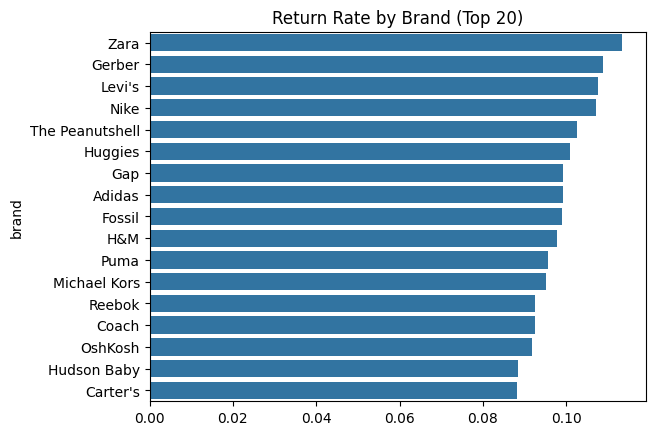

In [24]:
# 3. Returns Analysis by category/brand/age/device
if set(['is_returned','main_category','brand','customer_age_group','device_type']).intersection(df.columns):
    if 'main_category' in df.columns:
        rr = df.groupby('main_category')['is_returned'].mean().sort_values(ascending=False)
        fig = plt.figure()
        sns.barplot(x=rr.values, y=rr.index)
        plt.title('Return Rate by Main Category')
        plt.show()


    if 'brand' in df.columns:
        br = df.groupby('brand')['is_returned'].mean().sort_values(ascending=False).head(20)
        fig = plt.figure()
        sns.barplot(x=br.values, y=br.index)
        plt.title('Return Rate by Brand (Top 20)')
        plt.show()

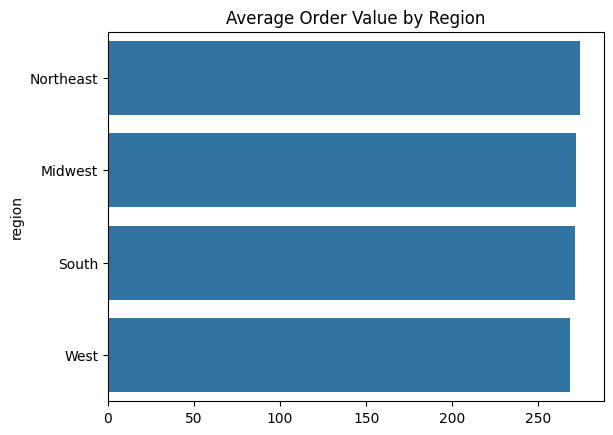

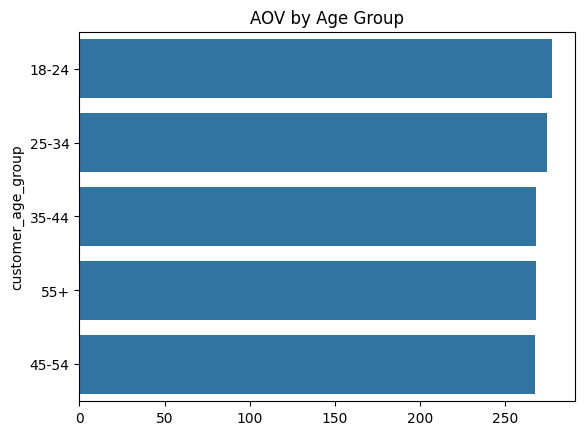

In [27]:
# %%
# 4. Customer behaviour: AOV by region/age
if set(['region','final_price']).issubset(df.columns):
    aov_region = df.groupby('region')['final_price'].mean().sort_values(ascending=False)
    fig = plt.figure()
    sns.barplot(x=aov_region.values, y=aov_region.index)
    plt.title('Average Order Value by Region')
    plt.show()


if set(['customer_age_group','final_price']).issubset(df.columns):
    aov_age = df.groupby('customer_age_group')['final_price'].mean().sort_values(ascending=False)
    fig = plt.figure()
    sns.barplot(x=aov_age.values, y=aov_age.index)
    plt.title('AOV by Age Group')
    plt.show()

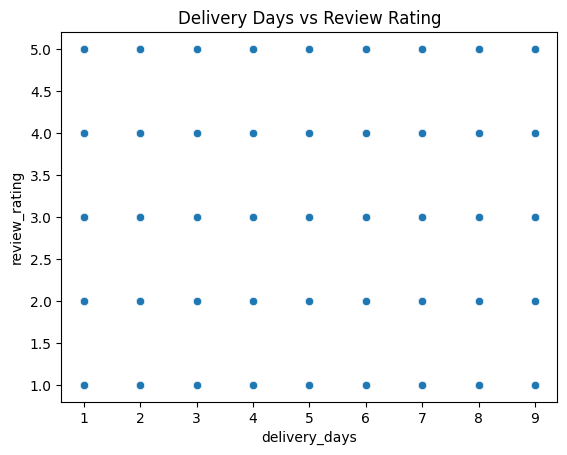

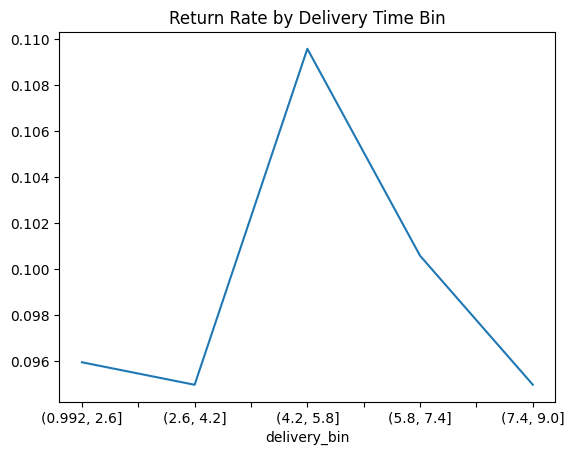

In [30]:
# %%
# 5. Delivery performance vs rating / return probability
if set(['delivery_days','review_rating','is_returned']).issubset(df.columns):
    fig = plt.figure()
    sns.scatterplot(x='delivery_days', y='review_rating', data=df.sample(min(len(df), 2000)))
    plt.title('Delivery Days vs Review Rating')
    plt.show()


# Binned analysis
    df['delivery_bin'] = pd.cut(df['delivery_days'], bins=5)
    bin_ret = df.groupby('delivery_bin')['is_returned'].mean()
    fig = plt.figure()
    bin_ret.plot()
    plt.title('Return Rate by Delivery Time Bin')
    plt.show()

In [33]:
# 7. Payment method insights
if set(['payment_method','is_returned','final_price']).issubset(df.columns):
    pm = df.groupby('payment_method').agg(return_rate=('is_returned','mean'), avg_spend=('final_price','mean')).sort_values('avg_spend', ascending=False)
    print('\nPayment method summary:')
    print(pm)
    pm.to_csv(OUT_DIR / 'payment_method_summary.csv')


Payment method summary:
                  return_rate   avg_spend
payment_method                           
Gift Card            0.105892  273.064448
Cash on Delivery     0.089006  272.263923
Credit Card          0.096904  270.785074
PayPal               0.101359  270.287144


Return Rate by Device:
 device_type
App         9.844495
Desktop    10.022953
Mobile      9.717671
Name: is_returned, dtype: float64


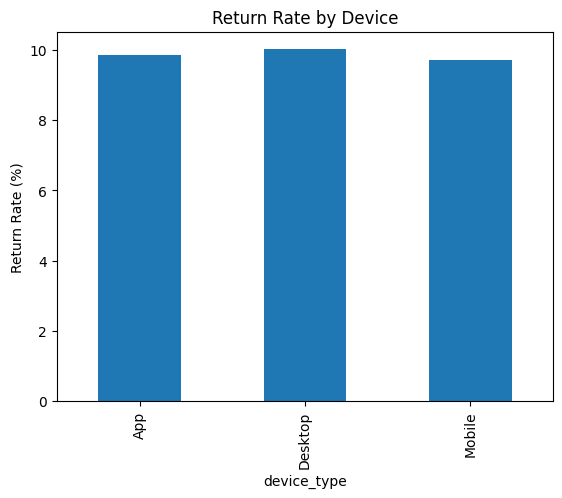

Return Rate by Category & Device:
 device_type          App    Desktop     Mobile
main_category                                 
Baby            9.616454  10.882016   8.970100
Kids           10.329670   9.174312   9.618668
Men            10.473538  10.092807   9.961262
Women           9.217877   9.545716  10.275126
baby            8.854167   8.720930  11.734694
kids            6.629834  10.204082   8.287293
men            11.111111  16.216216  10.050251
women          10.050251   7.894737   9.178744


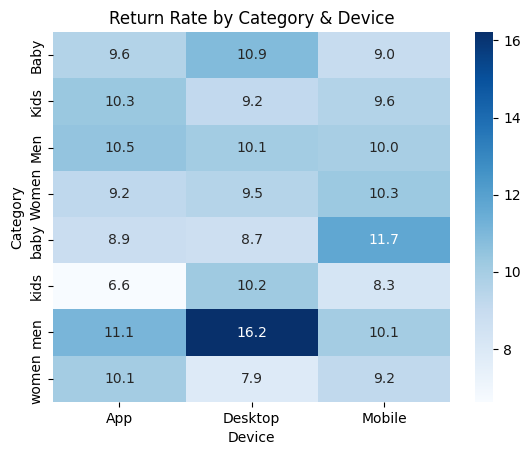

Delivery Performance by Region:
 delivery_speed       Fast       Slow
region                              
Midwest         33.232982  66.767018
Northeast       32.208589  67.791411
South           33.698031  66.301969
West            32.975512  67.024488


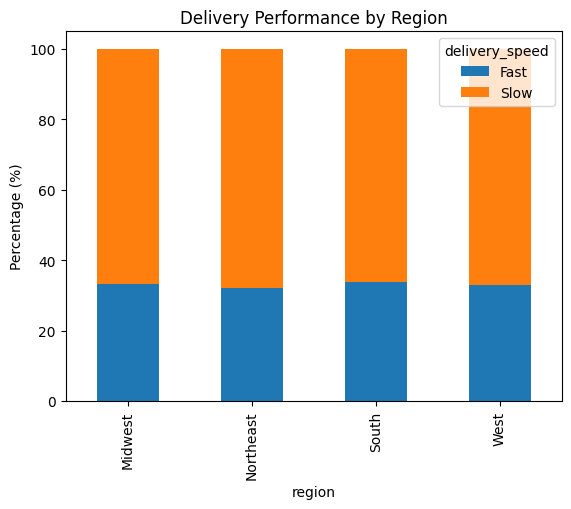

In [40]:
#8.     Cross-analysis:

cross_device = df.groupby(['device_type'])['is_returned'].mean() * 100
print("Return Rate by Device:\n", cross_device)

# Plot
cross_device.plot(kind='bar', title='Return Rate by Device')
plt.ylabel("Return Rate (%)")
plt.show()


cross_device_category = df.groupby(['main_category','device_type'])['is_returned'].mean().unstack() * 100
print("Return Rate by Category & Device:\n", cross_device_category)

# Heatmap
sns.heatmap(cross_device_category, annot=True, cmap="Blues", fmt=".1f")
plt.title("Return Rate by Category & Device")
plt.ylabel("Category")
plt.xlabel("Device")
plt.show()

delivery_region = df.groupby(['region'])['delivery_speed'].value_counts(normalize=True).unstack() * 100
print("Delivery Performance by Region:\n", delivery_region)

delivery_region.plot(kind='bar', stacked=True, title="Delivery Performance by Region")
plt.ylabel("Percentage (%)")
plt.show()

D. Hypothesis Ideas (picks/answers at least 5)
1.	Higher discounts lead to higher quantity sold but also higher return rates.

2.	Longer delivery times negatively impact review ratings and increase returns.

3.	Certain age groups (e.g., 25–34) have higher average order values.

4.	Customers ordering from specific regions have systematically different return behavior.

5.	Mobile shoppers behave differently in terms of average spend or returns compared to desktop.

6.	Premium brands (e.g., Nike) have lower return rates despite higher prices.

7.	Orders with low review ratings are predictive of being returned.

8.	Payment method “Gift Card” orders have distinct patterns in rating or returns.



In [43]:
from scipy import stats


hypotheses_results = []


# H1: Higher discounts -> higher quantity sold
if set(['discount_percent','quantity']).issubset(df.columns):
    low = df[df['discount_percent'] <= df['discount_percent'].median()]['quantity']
    high = df[df['discount_percent'] > df['discount_percent'].median()]['quantity']
    tstat, pval = stats.ttest_ind(high.dropna(), low.dropna(), equal_var=False)
    hypotheses_results.append(('High discount -> higher qty', tstat, pval))


# H2: Longer delivery -> lower rating
if set(['delivery_days','review_rating']).issubset(df.columns):
    corr = df[['delivery_days','review_rating']].dropna().corr().iloc[0,1]
    hypotheses_results.append(('Delivery days vs rating (pearson corr)', corr, None))


# H3: 25-34 age group AOV
if set(['customer_age_group','final_price']).issubset(df.columns):
    if '25-34' in df['customer_age_group'].unique():
        aov_2534 = df[df['customer_age_group']=='25-34']['final_price'].mean()
        overall = df['final_price'].mean()
        hypotheses_results.append(('AOV 25-34 vs overall', aov_2534, overall))


# H4: Mobile vs desktop return rate
if set(['device_type','is_returned']).issubset(df.columns):
    rates = df.groupby('device_type')['is_returned'].mean()
    hypotheses_results.append(('Return rate by device', rates.to_dict(), None))


# H5: Low rating predictive of return
if set(['review_rating','is_returned']).issubset(df.columns):
    low_rating = df[df['review_rating'] <= 2]['is_returned'].mean()
    high_rating = df[df['review_rating'] >= 4]['is_returned'].mean()
    hypotheses_results.append(('Return rate low vs high rating', low_rating, high_rating))


# Save hypothesis results
hyp_df = pd.DataFrame(hypotheses_results, columns=['hypothesis','metric','metric2'])
hyp_df.to_csv(OUT_DIR / 'hypothesis_results.csv', index=False)
print('\nHypothesis results saved to outputs/hypothesis_results.csv')
print(hyp_df)


Hypothesis results saved to outputs/hypothesis_results.csv
                               hypothesis  \
0             High discount -> higher qty   
1  Delivery days vs rating (pearson corr)   
2                    AOV 25-34 vs overall   
3                   Return rate by device   
4          Return rate low vs high rating   

                                              metric     metric2  
0                                           0.427267    0.669190  
1                                           0.009852         NaN  
2                                         274.464765  271.491812  
3  {'App': 0.09844494607474291, 'Desktop': 0.1002...         NaN  
4                                           0.096138    0.100683  


E. Advanced Analyses
1.	Cohort Analysis: Group customers by their first purchase month and track retention (repeat orders) over time.

2.	Customer Segmentation: Cluster customers based on RFM (Recency, Frequency, Monetary) and behavior (returns, rating).

3.	Price Elasticity Estimation: Approximate sensitivity of quantity sold to price/discount changes.

4.	Return Prediction Feature Ideas: Build a simple logistic regression or decision tree prototype to predict whether an order will be returned (feature importance discussion suffices for EDA).

5.	Anomaly Detection: Identify suspicious orders (e.g., extremely high discount with high quantity + immediate return).


6.	Time-to-Delivery Hotspots: Identify regions or product types with consistent delivery delays.


In [47]:
# 1) Simple Cohort Analysis template
if 'customer_id' in df.columns and 'order_month' in df.columns:
    first_order = df.groupby('customer_id')['order_date'].min().dt.to_period('M').rename('cohort')
    cohort_pivot = (df.groupby([first_order,'order_month'])['customer_id'].nunique()
    .unstack(fill_value=0))
    cohort_pivot.to_csv(OUT_DIR / 'cohort_pivot.csv')
    print('Cohort pivot saved')


# %%
# 2) RFM segmentation template
if 'customer_id' in df.columns and 'order_date' in df.columns and 'final_price' in df.columns:
    snapshot_date = df['order_date'].max() + pd.Timedelta(days=1)
    rfm = df.groupby('customer_id').agg(
    recency = ('order_date', lambda x: (snapshot_date - x.max()).days),
    frequency = ('order_id', 'nunique'),
    monetary = ('final_price', 'sum')
    )
    # simple scoring
    rfm['r_score'] = pd.qcut(rfm['recency'], 4, labels=False, duplicates='drop')
    rfm['f_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 4, labels=False, duplicates='drop')
    rfm['m_score'] = pd.qcut(rfm['monetary'], 4, labels=False, duplicates='drop')
    rfm['rfm_score'] = rfm['r_score'].astype(int) + rfm['f_score'].astype(int) + rfm['m_score'].astype(int)
    rfm.to_csv(OUT_DIR / 'rfm_segments.csv')
    print('RFM segments saved')

Cohort pivot saved
RFM segments saved
